**Classifiers Examples on random data**

In [ ]:
import numpy as np
X=np.array([[-1, -1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
y=np.array([1,1,1,2,2,2])
print(X)
print(y)

[[-1 -1]
 [-2 -1]
 [-3 -2]
 [ 1  1]
 [ 2  1]
 [ 3  2]]
[1 1 1 2 2 2]


In [ ]:
#Using the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier #Importing the classifier
clf_DT=DecisionTreeClassifier() #Creating the classifier
clf_DT.fit(X, y) #Training the classifier
print(clf_DT.predict([[-0.8,-1],[4,1]]))  #Predicting the output for 2 samples

[1 2]


[Text(0.5, 0.75, 'x[1] <= 0.0\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

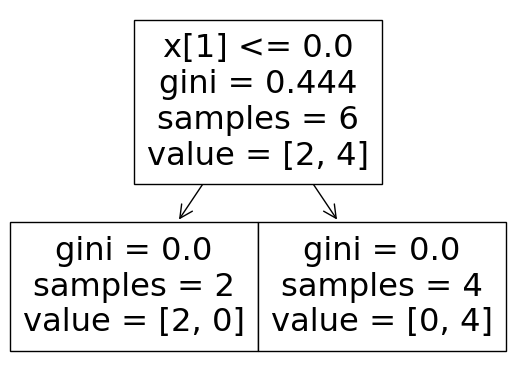

In [ ]:
from sklearn import tree
tree.plot_tree(clf_DT)

In [ ]:
#Using the KNN Classifier
from sklearn.neighbors import KNeighborsClassifier #Importing the classifier
clf_KNN=KNeighborsClassifier() #Creating the classifier
clf_KNN.fit(X, y) #Training the classifier
print(clf_KNN.predict([[-0.8,-1],[4,1]]))  #Predicting the output for 2 samples

[1 2]


In [ ]:
#Using the NB classifier
from sklearn.naive_bayes import GaussianNB #Importing the classifier
clf_NB=GaussianNB() #Creating the classifier
clf_NB.fit(X, y) #Training the classifier
print(clf_NB.predict([[-0.8,-1],[4,1]]))  #Predicting the output for 2 samples

[1 2]


**Use of Classifiers with the Iris Dataset**

In [ ]:
from sklearn.datasets import load_iris  #importing the dataset
X, y = load_iris(return_X_y=True)  # creating the vectors X and y
print('The size of X is', X.shape)
print('The first two rows of X are\n',X[0:2,0:4])
print('The size of y is', y.shape)
print('The first two values of y are\n',y[0:2])

The size of X is (150, 4)
The first two rows of X are
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
The size of y is (150,)
The first two values of y are
 [0 0]


In [ ]:
#Another way of creating the vectors X and y
from sklearn.datasets import load_iris  #importing the dataset
DatasetContent=load_iris(return_X_y=False)
print(DatasetContent.feature_names)
print(DatasetContent.target_names)
X=DatasetContent.data
y=DatasetContent.target
print('The size of X is', X.shape)
print('The first two rows of X are\n',X[0:2,0:4])
print('The size of y is', y.shape)
print('The first two values of y are\n',y[0:2])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
The size of X is (150, 4)
The first two rows of X are
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]]
The size of y is (150,)
The first two values of y are
 [0 0]


In [ ]:
#Another way using pandas (part 1)
import pandas as pd
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'Species']
data.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Another way using pandas (part 2)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
data.head()

,sepal length,sepal width,petal length,petal width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


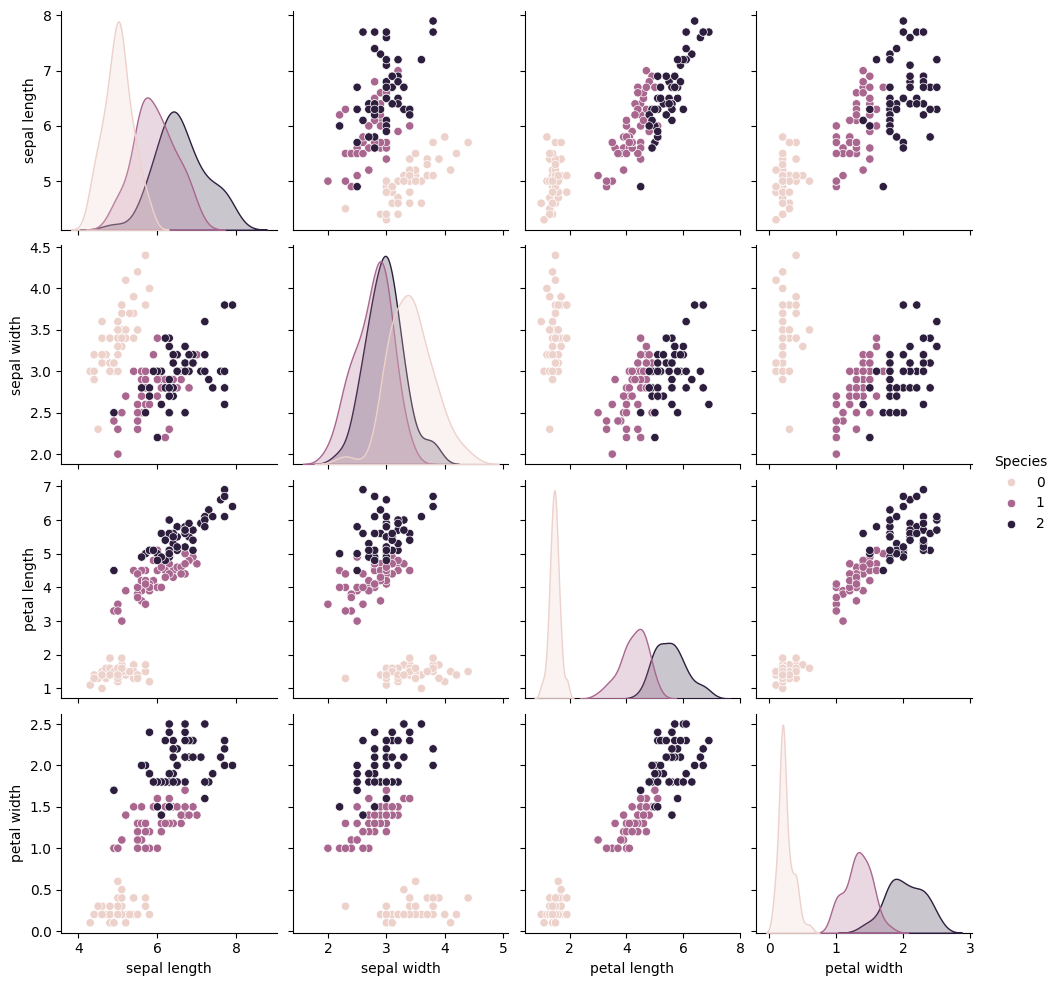

In [ ]:
import seaborn as sns
sns.pairplot(data,hue='Species')

In [ ]:
#Another way using pandas (part 3)
data_np=data.to_numpy()
X=data_np[:,0:4]
y=data_np[:,4]
y=y.astype(int)

In [ ]:
#Selecting the features to be used in building the classifiers
X=X[:,[1,3]]


**By this point, we have the vectors X and y to be used in our classifiers and we start the steps of the classification process**

In [ ]:
#Step 1: Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)
print('These are the first two rows of X_train:\n',X_train[0:2])


These are the first two rows of X_train:
 [[2.6 2.3]
 [3.8 0.3]]


In [ ]:
#Step 2: Importing the needed packages (you only import the package needed for your classifier)
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
#Step 3: Creating the classifier (you only create the classifier that you plan to use)
clf_DT = DecisionTreeClassifier() #DT Classifier
clf_KNN = KNeighborsClassifier(n_neighbors=3) #KNN Classifier
clf_NB = GaussianNB() #Gaussian NB
clf_SVM = LinearSVC()    #Linear SVM
clf_SVP = SVC(kernel='poly')     #Nonlinear SVM wih polynomial kernel
clf_SVC = SVC(kernel='rbf')     #Nonlinear SVM with radial basis functions kernel

In [ ]:
#Step 4: training the classifier (you only need to train the classifier you plan to use)
clf_DT= clf_DT.fit(X_train, y_train)
clf_KNN= clf_KNN.fit(X_train, y_train)
clf_NB= clf_NB.fit(X_train, y_train)
clf_SVM= clf_SVM.fit(X_train, y_train)
clf_SVP= clf_SVP.fit(X_train, y_train)
clf_SVC= clf_SVC.fit(X_train, y_train)

In [ ]:
#Step 5: Using the classifier to predict the output corresponding to X_test (you only need to train the classifier you plan to use)
y_test_pred_DT = clf_DT.predict(X_test)
y_test_pred_KNN = clf_KNN.predict(X_test)
y_test_pred_NB = clf_NB.predict(X_test)
y_test_pred_SVM = clf_SVM.predict(X_test)
y_test_pred_SVP = clf_SVP.predict(X_test)
y_test_pred_SVC = clf_SVC.predict(X_test)
print('This is the output for DT:\n',y_test_pred_DT)
print('This is the output for KNN:\n',y_test_pred_KNN)
print('This is the real output:\n',y_test)

This is the output for DT:
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
This is the output for KNN:
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
This is the real output:
 [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


In [ ]:
#Step 6: Evaluating the performance of the classifier on X_test (you only need to train the classifier you plan to use)
print ('These are the predicted values of y_test using the DT classifier:\n',y_test_pred_DT) #These are the predicted values of y_test using the DT classifier
print ('These are the values of y_test from the data:\n',y_test) #These are the values of y_test from the data
print('\nAccuracy using the DT classifier is: ', round(clf_DT.score(X_test, y_test),2))
print('\nAccuracy using the KNN classifier is: ', round(clf_KNN.score(X_test, y_test),2))
print('\nAccuracy using the NB classifier is: ', round(clf_NB.score(X_test, y_test),2))
print('\nAccuracy using the SVM classifier is: ', round(clf_SVM.score(X_test, y_test),2))
print('\nAccuracy using the SVP classifier is: ', round(clf_SVP.score(X_test, y_test),2))
print('\nAccuracy using the SVC classifier is: ', round(clf_SVC.score(X_test, y_test),2))

These are the predicted values of y_test using the DT classifier:
 [2 0 1 1 0 0 2 0 0 0 2 1 1 0 1 0 2 2 2 2 1 2 2 0 2 1 2 0 2 2 1 2 1 1 0 0 0
 1 0 2 1 0 2 1 2]
These are the values of y_test from the data:
 [2 0 1 1 0 0 1 0 0 0 2 1 1 0 1 0 2 2 2 2 2 2 2 0 2 1 1 0 2 2 2 2 1 1 0 0 0
 1 0 2 1 0 2 1 2]

Accuracy using the DT classifier is:  0.91

Accuracy using the KNN classifier is:  0.96

Accuracy using the NB classifier is:  0.93

Accuracy using the SVM classifier is:  0.96

Accuracy using the SVP classifier is:  0.93

Accuracy using the SVC classifier is:  0.93


In [ ]:
#Step 5: Using the classifier to predict the output corresponding to the training part of the vector X (X_train)
y_train_pred_DT = clf_DT.predict(X_train)
y_train_pred_KNN = clf_KNN.predict(X_train)
y_train_pred_NB = clf_NB.predict(X_train)
y_train_pred_SVM = clf_SVM.predict(X_train)
y_train_pred_SVP = clf_SVP.predict(X_train)
y_train_pred_SVC = clf_SVC.predict(X_train)

In [ ]:
#Step 6: Evaluating the performance of the classifier on X_train (you only need to train the classifier you plan to use)
print ('These are the predicted values of y_train using the DT classifier:\n',y_train_pred_DT) #These are the predicted values of y_test using the DT classifier
print ('These are the values of y_test from the data:\n',y_train) #These are the values of y_test from the data
print('\nAccuracy using the DT classifier is: ', round(clf_DT.score(X_train, y_train),2))
print('\nAccuracy using the KNN classifier is: ', round(clf_KNN.score(X_train, y_train),2))
print('\nAccuracy using the NB classifier is: ', round(clf_NB.score(X_train, y_train),2))
print('\nAccuracy using the SVM classifier is: ', round(clf_SVM.score(X_train, y_train),2))
print('\nAccuracy using the SVP classifier is: ', round(clf_SVP.score(X_train, y_train),2))
print('\nAccuracy using the SVC classifier is: ', round(clf_SVC.score(X_train, y_train),2))

These are the predicted values of y_train using the DT classifier:
 [2 1 2 1 2 1 2 0 2 0 0 0 0 2 1 0 1 0 2 1 1 2 1 2 2 2 0 1 0 2 2 0 0 0 1 1 2
 2 0 0 1 0 1 0 1 2 1 1 1 2 0 1 1 1 1 0 0 1 2 2 1 2 2 1 2 2 0 2 1 0 0 2 0 0
 1 0 0 1 1 2 2 1 2 2 0 1 1 0 0 1 0 0 1 2 1 0 1 2 0 2 1 0 2 0 1]
These are the values of y_test from the data:
 [2 1 2 1 2 1 2 0 2 0 0 0 0 2 1 0 1 0 2 1 1 2 1 2 2 2 0 1 0 2 2 0 0 0 1 1 2
 2 0 0 1 0 1 0 1 2 1 1 1 2 0 1 1 1 1 0 0 1 2 2 1 2 2 1 2 2 0 2 1 0 0 2 0 0
 1 0 0 1 1 2 2 1 2 2 0 1 1 0 0 1 0 0 1 2 1 0 1 2 0 2 1 0 2 0 1]

Accuracy using the DT classifier is:  1.0

Accuracy using the KNN classifier is:  0.97

Accuracy using the NB classifier is:  0.96

Accuracy using the SVM classifier is:  0.97

Accuracy using the SVP classifier is:  0.98

Accuracy using the SVC classifier is:  0.99


In [ ]:
#Step 5: Using the classifier to predict the output corresponding to the entire vector X (X)
y_all_pred_DT = clf_DT.predict(X)
y_all_pred_KNN = clf_KNN.predict(X)
y_all_pred_NB = clf_NB.predict(X)
y_all_pred_SVM = clf_SVM.predict(X)
y_all_pred_SVP = clf_SVP.predict(X)
y_all_pred_SVC = clf_SVC.predict(X)

In [ ]:
#Step 6: Evaluating the performance of the classifier on X (you only need to train the classifier you plan to use)
print ('These are the predicted values of y_train using the DT classifier:\n',y_all_pred_DT) #These are the predicted values of y_test using the DT classifier
print ('These are the values of y_test from the data:\n',y) #These are the values of y_test from the data
print('\nAccuracy using the DT classifier is: ', round(clf_DT.score(X, y),2))
print('\nAccuracy using the KNN classifier is: ', round(clf_KNN.score(X, y),2))
print('\nAccuracy using the NB classifier is: ', round(clf_NB.score(X, y),2))
print('\nAccuracy using the SVM classifier is: ', round(clf_SVM.score(X, y),2))
print('\nAccuracy using the SVP classifier is: ', round(clf_SVP.score(X, y),2))
print('\nAccuracy using the SVC classifier is: ', round(clf_SVC.score(X, y),2))

[Text(0.4, 0.9, 'x[2] <= 2.6\ngini = 0.665\nsamples = 105\nvalue = [36, 32, 37]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.65\ngini = 0.497\nsamples = 69\nvalue = [0, 32, 37]'),
 Text(0.2, 0.5, 'x[2] <= 5.0\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[0] <= 6.05\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5, 'x[2] <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'),
 Text(0.7, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 31\nvalue = [0, 0, 31]')]

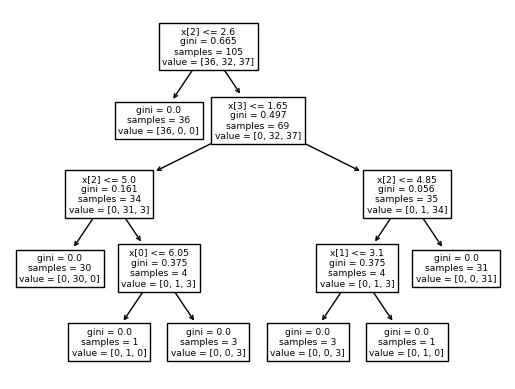

In [ ]:
from sklearn import tree
tree.plot_tree(clf_DT)

Text(0, 0.5, 'petal Width')

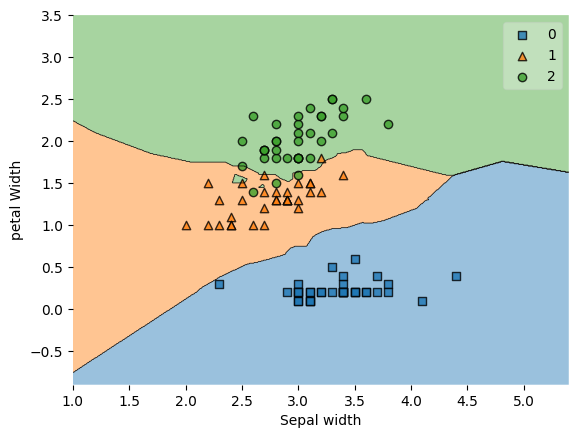

In [ ]:
#This requires that the X array has only two features.
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

plot_decision_regions(X_train, y_train, clf_KNN)
plt.xlabel('Sepal width')
plt.ylabel('petal Width')